# Introduction

**Assignment Instructions**: Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

Australia is one of the most urbanised nations in the world, more than two-thirds of Australians live in a capital city and 40% of the population live in the two largest cities Sydney and Melbourne. According to the Australian Bureau of Statistics (ABS), in 2019, 533,500 people immigrated to Australia. Immigration in 2020  reduced significantly as Australia closed its borders as a result of Covid-19. Once Covid-19 vaccinations are widely available, immigration will increase again. There are many factors that immigrants use when choosing where to live, such as where relatives or contacts are already living in, employment opportunities, cost of living, access to education etc. There are also lifestyle factors such as similar social and cultural opportunities. In this project, I am going to compare how similar or different Sydney and Melbourne are in terms of the number of places of interest, using Foursquare data, to better understand how each city might appeal to future immigrants. 

# Data

**Assignment Instructions**: Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

**Data Source 1**
Foursquare data provides access to places of interest. The places that I will be comparing for both cities are those related to food, nightlife, arts & entertainment, outdoors & recreation, shops: https://developer.foursquare.com/docs/build-with-foursquare/categories/

**Data Source 2**
In order to visualise the places in each city, we need to have geographical information in order to plot them onto a map. Postcodes in Australia is provided by Australia Post, this data is combined with regional location information, as defined by the Australian Bureau of Statistics (ABS), into a single data source that allows you to identify a city, it's suburbs, latitude and longitude coordinates from this site: https://www.matthewproctor.com/australian_postcodes

Here are the definitions for the data fields in the Australian postcode file.

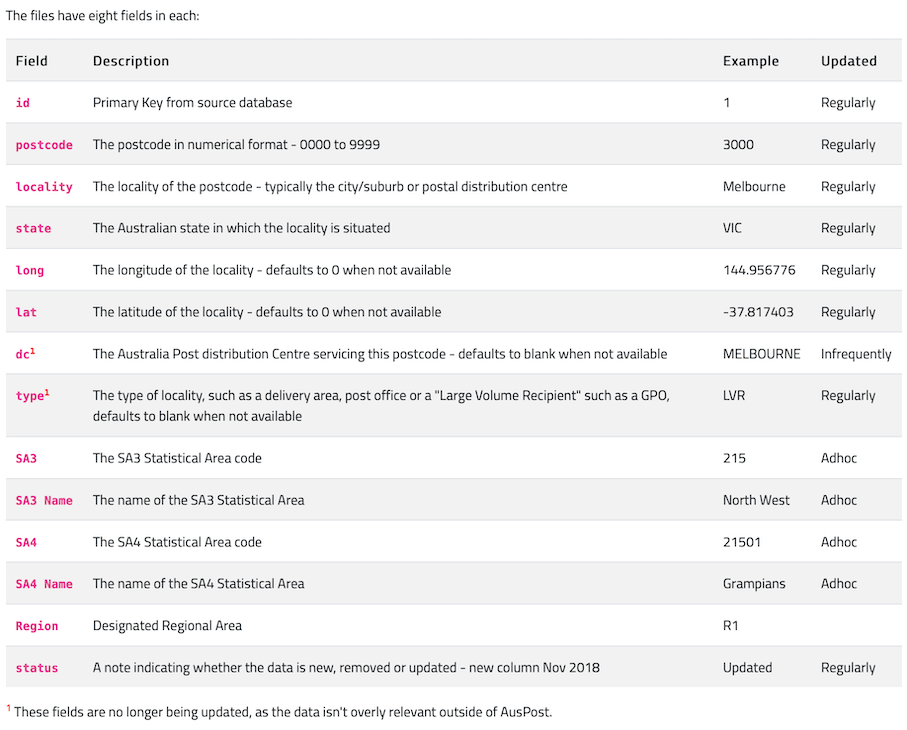

# Methodology

**Assignment Instructions**: Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

In [1]:
# Import required packages
import pandas as pd
import numpy as np

In [2]:
# The code was removed by Watson Studio for sharing.

(18275, 14)


,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name,region
0,230,200,ANU,ACT,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1
1,21820,200,Australian National University,ACT,149.118900,-35.277700,NaN,NaN,Added 19-Jan-2020,NaN,NaN,NaN,NaN,R1
2,232,800,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,Darwin City,701.0,Darwin,R1
3,233,801,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 25-Mar-2020 SA3,70101.0,Darwin City,701.0,Darwin,R1
4,234,804,PARAP,NT,130.873315,-12.428017,NaN,NaN,Updated 25-Mar-2020 SA3,70102.0,Darwin Suburbs,701.0,Darwin,R1


In [3]:
# Drop columns to remove information not required
df.drop(['id', 'locality', 'state', 'dc', 'type', 'status', 'sa3', 'sa4', 'region'], axis=1, inplace=True)

print(df.shape)
df.head()

(18275, 5)


,postcode,long,lat,sa3name,sa4name
0,200,0.000000,0.000000,NaN,NaN
1,200,149.118900,-35.277700,NaN,NaN
2,800,130.836680,-12.458684,Darwin City,Darwin
3,801,130.836680,-12.458684,Darwin City,Darwin
4,804,130.873315,-12.428017,Darwin Suburbs,Darwin


In [4]:
# Remove rows where sa4name is blank in order to be able to filter on that column
df2=df[df.sa4name.notnull()]
print(df2.shape)
df2.head()

(18026, 5)


,postcode,long,lat,sa3name,sa4name
2,800,130.836680,-12.458684,Darwin City,Darwin
3,801,130.836680,-12.458684,Darwin City,Darwin
4,804,130.873315,-12.428017,Darwin Suburbs,Darwin
5,810,130.866242,-12.381806,Darwin Suburbs,Darwin
6,810,130.866242,-12.381806,Darwin Suburbs,Darwin


In [5]:
# Create a dataframe for Sydney, where Sydney is in the SA4 Name column
df_syd = df2[df2['sa4name'].str.contains("Sydney")].reset_index(drop=True)
print(df_syd.shape)
df_syd.head()

(1355, 5)


,postcode,long,lat,sa3name,sa4name
0,1001,151.268071,-33.794883,Sydney Inner City,Sydney - City and Inner South
1,1002,151.268071,-33.794883,Sydney Inner City,Sydney - City and Inner South
2,1003,151.268071,-33.794883,Sydney Inner City,Sydney - City and Inner South
3,1004,151.268071,-33.794883,Sydney Inner City,Sydney - City and Inner South
4,1005,151.268071,-33.794883,Sydney Inner City,Sydney - City and Inner South


In [6]:
# Remove post codes that are not associated with an actual location
df_syd = df_syd[df_syd['postcode'] > 2000].reset_index(drop=True)
print(df_syd.shape)
df_syd.head()

(1121, 5)


,postcode,long,lat,sa3name,sa4name
0,2001,151.268071,-33.794883,Sydney Inner City,Sydney - City and Inner South
1,2006,151.186507,-33.889219,Sydney Inner City,Sydney - City and Inner South
2,2007,151.196650,-33.883189,Sydney Inner City,Sydney - City and Inner South
3,2007,151.196650,-33.883189,Sydney Inner City,Sydney - City and Inner South
4,2008,151.193858,-33.891146,Sydney Inner City,Sydney - City and Inner South


In [40]:
# Calculate average longitude for all postcodes in each Sydney regions and output to dataframe
syd_long = df_syd.groupby('sa3name', as_index=False)['long'].mean()
print(syd_long.shape)
syd_long.head()

(43, 2)


,sa3name,long
0,Auburn,151.046030
1,Bankstown,151.007752
2,Baulkham Hills,151.000948
3,Blacktown,150.935836
4,Blacktown - North,150.915366


In [41]:
# Calculate average latitude for all postcodes in each Sydney regions and output to dataframe
syd_lat = df_syd.groupby('sa3name', as_index=False)['lat'].mean()
print(syd_lat.shape)
syd_lat.head()

(43, 2)


,sa3name,lat
0,Auburn,-33.861337
1,Bankstown,-33.939347
2,Baulkham Hills,-33.732380
3,Blacktown,-33.766075
4,Blacktown - North,-33.726999


In [56]:
# Create new dataframe for Sydney regions and their longitude and latitude
df_syd_ll = syd_lat.merge(syd_long,on='sa3name')
df_syd_ll.columns = ['Region','latitude','longitude']
print(df_syd_ll.shape)
df_syd_ll.head()

(43, 3)


,Region,latitude,longitude
0,Auburn,-33.861337,151.046030
1,Bankstown,-33.939347,151.007752
2,Baulkham Hills,-33.732380,151.000948
3,Blacktown,-33.766075,150.935836
4,Blacktown - North,-33.726999,150.915366


### Create map and access Foursquare data

In [8]:
# Download all the dependencies we will need

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 94 kB 4.2 MB/s  eta 0:00:01
Libraries imported.


In [9]:
# Identify the geographical coordinates of Sydney.
address = 'Sydney, AU'

geolocator = Nominatim(user_agent="sydney_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Sydney are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Sydney are -33.8548157, 151.2164539.


In [46]:
# Create map of Sydney and it's regions using latitude and longitude values
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(df_syd_ll['latitude'], df_syd_ll['longitude'], df_syd_ll['region']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sydney)  
    
map_sydney

In [28]:
# Define Foursquare Credentials and Version in order to utilise the Foursquare API to explore neighbourhoods and segment them
CLIENT_ID = 'QPR15YS0C4T35AW243NMTFK13OLFAB3J5DCDCIUF3OHRDTBV' # your Foursquare ID
CLIENT_SECRET = 'U2XDI4HVCEXKS45VYWMKT4QIOQGXM5P2DCZ30UJ4TRN3AUVR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 5000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QPR15YS0C4T35AW243NMTFK13OLFAB3J5DCDCIUF3OHRDTBV
CLIENT_SECRET:U2XDI4HVCEXKS45VYWMKT4QIOQGXM5P2DCZ30UJ4TRN3AUVR


In [29]:
# Create a function to explore the venues in Sydney regions 
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Region', 
                  'Region Latitude', 
                  'Region Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
# Run the above function on each region and create a new dataframe called sydney_venues.
sydney_venues = getNearbyVenues(names=df_syd_ll['region'],
                                   latitudes=df_syd_ll['latitude'],
                                   longitudes=df_syd_ll['longitude']
                                  )

Auburn
Bankstown
Baulkham Hills
Blacktown
Blacktown - North
Blue Mountains
Blue Mountains - South
Botany
Bringelly - Green Valley
Campbelltown (NSW)
Canada Bay
Canterbury
Carlingford
Chatswood - Lane Cove
Cronulla - Miranda - Caringbah
Dural - Wisemans Ferry
Eastern Suburbs - North
Eastern Suburbs - South
Fairfield
Hawkesbury
Hornsby
Hurstville
Kogarah - Rockdale
Ku-ring-gai
Leichhardt
Liverpool
Manly
Marrickville - Sydenham - Petersham
Merrylands - Guildford
Mount Druitt
North Sydney - Mosman
Parramatta
Pennant Hills - Epping
Penrith
Pittwater
Richmond - Windsor
Ryde - Hunters Hill
St Marys
Strathfield - Burwood - Ashfield
Sutherland - Menai - Heathcote
Sydney Inner City
Warringah
Wollondilly


In [48]:
# Check the dataframe size
print(sydney_venues.shape)
sydney_venues.head()

(3079, 7)


,Region,Region Latitude,Region Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Auburn,-33.861337,151.04603,Tanomi,-33.862396,151.045030,Japanese Restaurant
1,Auburn,-33.861337,151.04603,Jasmine 1,-33.850923,151.033710,Lebanese Restaurant
2,Auburn,-33.861337,151.04603,Chubby Buns,-33.850130,151.053130,Burger Joint
3,Auburn,-33.861337,151.04603,Japanese Gardens,-33.868328,151.040613,Garden
4,Auburn,-33.861337,151.04603,Hanabi,-33.865212,151.043527,Korean Restaurant


In [49]:
# Check how many venues were returned for each region
sydney_venues.groupby('Region').count()

,Region Latitude,Region Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Region,,,,,,
Auburn,100,100,100,100,100,100
Bankstown,100,100,100,100,100,100
Baulkham Hills,86,86,86,86,86,86
Blacktown,100,100,100,100,100,100
Blacktown - North,100,100,100,100,100,100
Blue Mountains,5,5,5,5,5,5
Blue Mountains - South,2,2,2,2,2,2
Botany,100,100,100,100,100,100
Bringelly - Green Valley,2,2,2,2,2,2


In [50]:
# Find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(sydney_venues['Venue Category'].unique())))

There are 256 uniques categories.


In [51]:
# Analyse Each Region
# one hot encoding
sydney_onehot = pd.get_dummies(sydney_venues[['Venue Category']], prefix="", prefix_sep="")

# add region column back to dataframe
sydney_onehot['Region'] = sydney_venues['Region'] 

# move region column to the first column
fixed_columns = [sydney_onehot.columns[-1]] + list(sydney_onehot.columns[:-1])
sydney_onehot = sydney_onehot[fixed_columns]

print(sydney_onehot.shape)
sydney_onehot.head()

(3079, 257)


,Region,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Camera Store,Campground,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Rec Center,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Costume Shop,Creperie,Cricket Ground,Cupcake Shop,Dam,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Dutch Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Heliport,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Lebanese Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nature Preserve,Neighborhood,Nightclub,Non-Profit,Noodle House,Nudist Beach,Office,Opera House,Other Great Outdoors,Outlet Mall,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Recreation Center,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Shop,Skydiving Drop Zone,Snack Place,Soccer Field,Social Club,South American Restaurant,South Indian Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tour Provider,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Auburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [52]:
# Group rows by Region and by taking the mean of the frequency of occurrence of each category
sydney_grouped = sydney_onehot.groupby('Region').mean().reset_index()
print(sydney_grouped.shape)
sydney_grouped

(41, 257)


,Region,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Camera Store,Campground,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Rec Center,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Costume Shop,Creperie,Cricket Ground,Cupcake Shop,Dam,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Dutch Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Heliport,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Lebanese Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nature Preserve,Neighborhood,Nightclub,Non-Profit,Noodle House,Nudist Beach,Office,Opera House,Other Great Outdoors,Outlet Mall,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Recreation Center,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Shop,Skydiving Drop Zone,Snack Place,Soccer Field,Social Club,South American Restaurant,South Indian Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tour Provider,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Auburn,0.01,0.010000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.01,0.000000,0.010000,0.000000,0.00,0.020000,0.010000,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.00,0.150000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00

In [38]:
# Create a function to sort the most common venues in each region in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
# Create a new dataframe and display the top 10 venues for each region.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Region']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
regions_venues_sorted = pd.DataFrame(columns=columns)
regions_venues_sorted['Region'] = sydney_grouped['Region']

for ind in np.arange(sydney_grouped.shape[0]):
    regions_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sydney_grouped.iloc[ind, :], num_top_venues)

regions_venues_sorted.head()

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auburn,Café,Vietnamese Restaurant,Park,Korean Restaurant,Indian Restaurant,Thai Restaurant,Supermarket,Lebanese Restaurant,Dessert Shop,Garden
1,Bankstown,Fast Food Restaurant,Café,Grocery Store,Vietnamese Restaurant,Sandwich Place,Pizza Place,Convenience Store,Train Station,Department Store,Coffee Shop
2,Baulkham Hills,Café,Gym,Shopping Mall,Supermarket,Pizza Place,Fast Food Restaurant,Convenience Store,Thai Restaurant,Burger Joint,Italian Restaurant
3,Blacktown,Supermarket,Fast Food Restaurant,Sandwich Place,Café,Convenience Store,Pizza Place,Coffee Shop,Grocery Store,Indian Restaurant,Shopping Mall
4,Blacktown - North,Fast Food Restaurant,Café,Supermarket,Grocery Store,Coffee Shop,Pizza Place,Sandwich Place,Thai Restaurant,Juice Bar,Convenience Store


In [61]:
# Run k-means to cluster the neighborhood into 4 clusters.
# set number of clusters
kclusters = 4

sydney_grouped_clustering = sydney_grouped.drop('Region', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 1, 2, 0, 3, 0], dtype=int32)

In [62]:
# Create a new dataframe that includes the cluster as well as the top 10 venues for each region.
# add clustering labels
regions_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sydney_merged = df_syd_ll

# merge sydney_grouped with df_syd_ll to add latitude/longitude for each region
sydney_merged = sydney_merged.join(regions_venues_sorted.set_index('Region'), on='Region')

sydney_merged.head() # check the dataframe

,Region,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auburn,-33.861337,151.046030,0.0,Café,Vietnamese Restaurant,Park,Korean Restaurant,Indian Restaurant,Thai Restaurant,Supermarket,Lebanese Restaurant,Dessert Shop,Garden
1,Bankstown,-33.939347,151.007752,0.0,Fast Food Restaurant,Café,Grocery Store,Vietnamese Restaurant,Sandwich Place,Pizza Place,Convenience Store,Train Station,Department Store,Coffee Shop
2,Baulkham Hills,-33.732380,151.000948,0.0,Café,Gym,Shopping Mall,Supermarket,Pizza Place,Fast Food Restaurant,Convenience Store,Thai Restaurant,Burger Joint,Italian Restaurant
3,Blacktown,-33.766075,150.935836,0.0,Supermarket,Fast Food Restaurant,Sandwich Place,Café,Convenience Store,Pizza Place,Coffee Shop,Grocery Store,Indian Restaurant,Shopping Mall
4,Blacktown - North,-33.726999,150.915366,0.0,Fast Food Restaurant,Café,Supermarket,Grocery Store,Coffee Shop,Pizza Place,Sandwich Place,Thai Restaurant,Juice Bar,Convenience Store


In [70]:
print(sydney_merged.shape)
sydney_merged["Cluster Labels"].value_counts()

(43, 14)


0.0    38
3.0     1
2.0     1
1.0     1
Name: Cluster Labels, dtype: int64

In [67]:
sydney_merged[["Cluster Labels"]] = sydney_merged[["Cluster Labels"]].astype("int")
sydney_merged.info()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [63]:
# Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sydney_merged['latitude'], sydney_merged['longitude'], sydney_merged['Region'], sydney_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

# Different Approach

# Results

**Assignment Instructions**: Results section where you discuss the results.

# Discussion

**Assignment Instructions**: Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

# Conclusion

**Assignment Instructions**: Conclusion section where you conclude the report.